***
# **Student Name: Zhiheng Zhou**

# **Student ID: 260955157**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# References:
# ECSE415 Tutorial: cifar10_tutorial

# **1.1.0 Load the dataset**

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:10<00:00, 16035620.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# **1.1.1 Implement a CNN (kernel size = 3x3)**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1)
        self.conv4 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 10) # output channel = 64, size = 16 * 16 (32/2)

    def forward(self, x):
      # Keep updating x
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(x.size(0),-1) #Flatten
        x = self.fc1(x)
        return x

# **1.1.2 Create an instance of SGD optimizer**

In [ ]:
net = Net();
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.9)

# **1.1.3 Train the CNN**

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.239
[1,   400] loss: 1.924
[1,   600] loss: 1.764
[1,   800] loss: 1.637
[1,  1000] loss: 1.552
[1,  1200] loss: 1.480
[1,  1400] loss: 1.459
[2,   200] loss: 1.349
[2,   400] loss: 1.314
[2,   600] loss: 1.287
[2,   800] loss: 1.234
[2,  1000] loss: 1.230
[2,  1200] loss: 1.174
[2,  1400] loss: 1.161
[3,   200] loss: 1.076
[3,   400] loss: 1.066
[3,   600] loss: 1.067
[3,   800] loss: 1.046
[3,  1000] loss: 1.029
[3,  1200] loss: 1.025
[3,  1400] loss: 0.979
[4,   200] loss: 0.925
[4,   400] loss: 0.901
[4,   600] loss: 0.896
[4,   800] loss: 0.898
[4,  1000] loss: 0.881
[4,  1200] loss: 0.855
[4,  1400] loss: 0.851
[5,   200] loss: 0.781
[5,   400] loss: 0.775
[5,   600] loss: 0.809
[5,   800] loss: 0.768
[5,  1000] loss: 0.804
[5,  1200] loss: 0.753
[5,  1400] loss: 0.778
[6,   200] loss: 0.686
[6,   400] loss: 0.682
[6,   600] loss: 0.682
[6,   800] loss: 0.693
[6,  1000] loss: 0.716
[6,  1200] loss: 0.702
[6,  1400] loss: 0.709
[7,   200] loss: 0.615
[7,   400] 

# **1.1.4 Displaying the accuracy**

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 75 %


# **1.2.1 Implement a CNN (kernel size = 5x5)**

In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv2_1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 5, padding = 2, stride = 1)
        self.conv2_2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, padding = 2, stride = 1)
        self.conv2_3 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 5, padding = 2, stride = 1)
        self.conv2_4 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 5, padding = 2, stride = 1)
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        self.fc2_1 = nn.Linear(64 * 16 * 16, 10) # output channel = 64, size = 16 * 16 (32/2)

    def forward(self, y):
      # Keep updating y
        y = F.relu(self.conv2_1(y))
        y = F.relu(self.conv2_2(y))
        y = self.pool2(y)
        y = F.relu(self.conv2_3(y))
        y = F.relu(self.conv2_4(y))
        y = y.view(y.size(0),-1) #Flatten
        y = self.fc2_1(y)
        return y

# **1.2.2 Create an instance of SGD optimizer**

In [ ]:
net2 = Net2();
criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net2.parameters(), lr=0.002, momentum=0.9)

# **1.2.3 Train the CNN**

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.184
[1,   400] loss: 1.871
[1,   600] loss: 1.668
[1,   800] loss: 1.560
[1,  1000] loss: 1.512
[1,  1200] loss: 1.420
[1,  1400] loss: 1.359
[2,   200] loss: 1.264
[2,   400] loss: 1.233
[2,   600] loss: 1.220
[2,   800] loss: 1.171
[2,  1000] loss: 1.147
[2,  1200] loss: 1.102
[2,  1400] loss: 1.096
[3,   200] loss: 0.995
[3,   400] loss: 0.987
[3,   600] loss: 0.968
[3,   800] loss: 0.943
[3,  1000] loss: 0.915
[3,  1200] loss: 0.898
[3,  1400] loss: 0.892
[4,   200] loss: 0.807
[4,   400] loss: 0.812
[4,   600] loss: 0.790
[4,   800] loss: 0.785
[4,  1000] loss: 0.783
[4,  1200] loss: 0.763
[4,  1400] loss: 0.783
[5,   200] loss: 0.673
[5,   400] loss: 0.689
[5,   600] loss: 0.681
[5,   800] loss: 0.688
[5,  1000] loss: 0.670
[5,  1200] loss: 0.678
[5,  1400] loss: 0.673
[6,   200] loss: 0.590
[6,   400] loss: 0.605
[6,   600] loss: 0.607
[6,   800] loss: 0.591
[6,  1000] loss: 0.618
[6,  1200] loss: 0.609
[6,  1400] loss: 0.603
[7,   200] loss: 0.528
[7,   400] 

# **1.2.4 Display the accuracy**

In [ ]:
correct2 = 0
total2 = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total2 += labels.size(0)
        correct2 += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct2 / total2))

Accuracy of the network on the 10000 test images: 76 %


When implementing a CNN with a 3x3 kernel size, the runtime was approximately half an hour, yielding an accuracy of 75%. Changing kernel size to 5x5, the runtime doubled, reaching an hour, but there was an improvement in accuracy, which rose to 76%.  The larger kernel size made the model more computationally intensive, prompting a trade-off between runtime and marginal accuracy gains.

As discussed above, ***kernel size*** is one of the factors that affect the CNN performance. Other than that, the choice of ***activation functions*** (e.g., ReLU, sigmoid, etc.) affects its performance as well. Proper activation functions help the network learn complex relationships. Moreover, the ***batch size*** used during training affects the stability of the training process and can influence convergence.

# **Part 2 YOLOv3**




In [1]:
# References: https://pjreddie.com/darknet/yolo/

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# clone the darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 15833 (delta 157), reused 222 (delta 140), pack-reused 15539
Receiving objects: 100% (15833/15833), 14.75 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (10587/10587), done.


In [3]:
# change makefile to have GPU and enable opencv
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [5]:
# make darknet
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [6]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-11-12 21:15:05--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  58.6MB/s    in 3.9s    

2023-11-12 21:15:09 (61.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



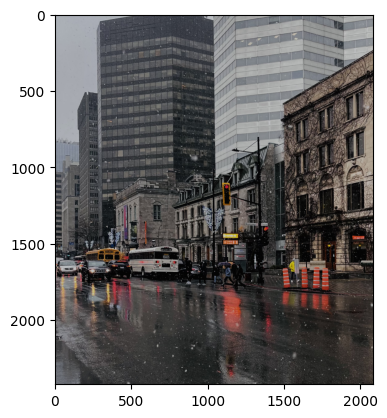

In [7]:
# Display the image of a street in Montreal
import matplotlib.pyplot as plt
import cv2
MTL = cv2.imread('/content/drive/MyDrive/ECSE415/Colab_Notebooks_A4/MTL.jpg')
MTLFixed = cv2.cvtColor(MTL, cv2.COLOR_BGR2RGB)
plt.imshow(MTLFixed)
plt.show()

In [8]:
# Helper functions: imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# Download a file
def download(path):
  from google.colab import files
  files.download(path)

[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64

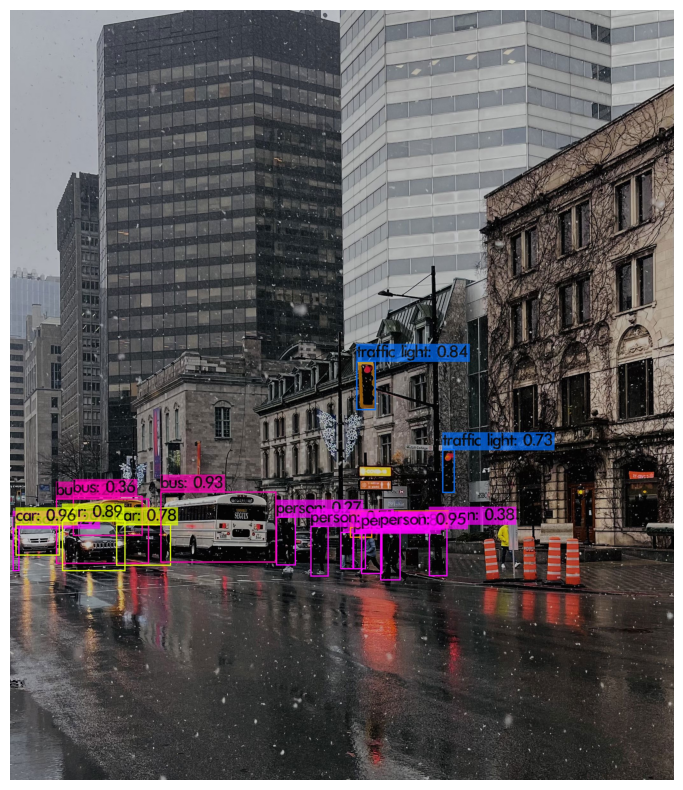

In [9]:
# Run darknet detection
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/My\ Drive/ECSE415/Colab_Notebooks_A4/MTL.jpg
# Show image using the helper function
imShow('predictions.jpg')

# **Show results in a table**

In [36]:
# References: https://medium.com/axinc-ai/yolov3-a-machine-learning-model-to-detect-the-position-and-type-of-an-object-60f1c18f8107#:~:text=In%20case%20you%20are%20using,categories%20using%20the%20get_object%20API.

from collections import Counter

def display_results(category, class_ids):
    class_counts = Counter(category[class_id] for class_id in class_ids)

    # Display results in a table
    print("Category\tQuantity")
    for class_name, count in class_counts.items():
        print(f"{class_name}\t\t{count}")

In [37]:
# Parse results and display the table
import cv2
import numpy as np

# Load YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "/content/darknet/cfg/yolov3.cfg")
layer_names = net.getUnconnectedOutLayersNames()

# Load and preprocess image
image = cv2.imread("/content/drive/My Drive/ECSE415/Colab_Notebooks_A4/MTL.jpg")
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

# Perform a forward pass
net.setInput(blob)
outs = net.forward(layer_names)

# Post-processing
boxes = []
confidences = []
class_ids = []
category = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
        "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
        "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
        "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
        "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
        "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
        "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
        "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
        "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
        "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = int(np.argmax(scores))
        confidence = float(scores[class_id])
        if confidence > 0.5:
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype(int)
            x, y = int(center_x - w / 2), int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(confidence)
            class_ids.append(class_id)

# Draw bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(class_ids), 3))

for i in range(len(indices)):
    idx = i  # Unpack the index from the array
    if idx < len(boxes):
        box = boxes[idx]
        x, y, w, h = box
        class_id = class_ids[idx]
        color = colors[idx]
        label = str(classes[class_id])
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


# Display results in a table
display_results(category, class_ids)


Category	Quantity
bus		3
traffic light		4
car		7
umbrella		1
person		6
